In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#os.getcwd()

# Linux workstation
#data_path = '/home/db600/phd/data/'

# Laptop
data_path = 'C:\\Users\\dan\\Documents\\phd\\data\\'

os.listdir(data_path)

['biomart',
 'depmap',
 'missing_gene_names.csv',
 'pathway_commons',
 'reactome',
 'reactome_rows_to_drop.csv',
 'string']

In [17]:
reactome = pd.read_csv(data_path + "pathway_commons/PathwayCommons12.reactome.hgnc.txt", sep="\t")
reactome.head()
reactome.columns

Index(['PARTICIPANT_A', 'INTERACTION_TYPE', 'PARTICIPANT_B',
       'INTERACTION_DATA_SOURCE', 'INTERACTION_PUBMED_ID', 'PATHWAY_NAMES',
       'MEDIATOR_IDS'],
      dtype='object')

In [18]:
print(reactome['INTERACTION_TYPE'].unique())

['in-complex-with' 'controls-state-change-of' 'controls-production-of'
 'controls-transport-of' 'controls-transport-of-chemical'
 'catalysis-precedes' 'controls-phosphorylation-of'
 'controls-expression-of' 'chemical-affects' 'used-to-produce'
 'consumption-controlled-by' 'reacts-with' 'PARTICIPANT_TYPE'
 'SmallMoleculeReference' 'ProteinReference'
 'DnaReference;ProteinReference' 'ProteinReference;RnaReference'
 'DnaReference;ProteinReference;RnaReference' 'DnaReference'
 'RnaReference' 'DnaReference;RnaReference']


In [19]:
# Get row count for number of edges in the dataset
len(reactome)

365961

365961
365961
731922


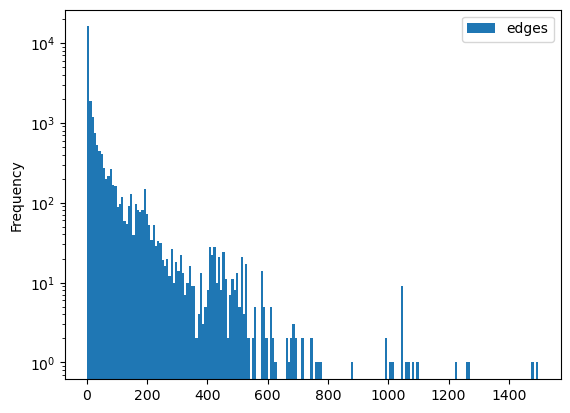

In [20]:
# Get number of nodes and edges and plot histogram of edges showing number of nodes with X edges 
total_gene_a = reactome['PARTICIPANT_A'].tolist()
total_gene_b = reactome['PARTICIPANT_B'].tolist()
total_gene = total_gene_a + total_gene_b

total_gene_df = pd.DataFrame(total_gene, columns=['gene'])

total_gene_df['edges'] = total_gene_df['gene'].map(total_gene_df['gene'].value_counts())

print(len(total_gene_a))
print(len(total_gene_b))
print(len(total_gene))

total_gene_df.head()

unique_gene_df = total_gene_df.drop_duplicates('gene') 
unique_gene_df.sort_values(by='edges', ascending=False)

fig = unique_gene_df.plot(kind='hist', bins=200)

plt.yscale('log')
plt.show()

In [21]:
# See how many unique nodes there are in total
unique_gene_a = reactome['PARTICIPANT_A'].unique().tolist()
unique_gene_b = reactome['PARTICIPANT_B'].unique().tolist()
unique_gene_all = set(unique_gene_a + unique_gene_b)

print(len(unique_gene_a))
print(len(unique_gene_b))
print(len(unique_gene_all))

#df = pd.DataFrame.from_dict(count, orient='index')
#df.plot(kind='bar')

12325
23132
24539


In [22]:
reactome_duplicates = reactome[reactome.duplicated(subset=['PARTICIPANT_A', 'PARTICIPANT_B'], keep=False)]

reactome_duplicates[reactome_duplicates['PARTICIPANT_A']=='AAAS']

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS
59,AAAS,controls-state-change-of,AGO2,Reactome,15643423;18842624;19167051;22064859;23150874;2...,Transcriptional regulation by small RNAs,http://pathwaycommons.org/pc12/Catalysis_2ee64...
60,AAAS,controls-transport-of,AGO2,Reactome,15643423;18842624;19167051;22064859;23150874;2...,Transcriptional regulation by small RNAs,http://pathwaycommons.org/pc12/Catalysis_2ee64...
61,AAAS,controls-state-change-of,ALYREF,Reactome,11014198;12003494;15120988;17317185;19494120;2...,Transport of Mature mRNA Derived from an Intro...,http://identifiers.org/reactome/R-HSA-158447;h...
62,AAAS,controls-transport-of,ALYREF,Reactome,2017161;23804756,Transport of Mature mRNA Derived from an Intro...,http://identifiers.org/reactome/R-HSA-158481;h...
63,AAAS,in-complex-with,ALYREF,Reactome,NaN,Transport of Mature mRNA derived from an Intro...,http://pathwaycommons.org/pc12/Complex_0070704...
...,...,...,...,...,...,...,...
242,AAAS,controls-state-change-of,XPO1,Reactome,11124902;11231581;11289803;11451485;11932251;1...,NEP/NS2 Interacts with the Cellular Export Mac...,http://identifiers.org/reactome/R-HSA-168880;h...
243,AAAS,controls-transport-of,XPO1,Reactome,11124902;11231581;11289803;11451485;11932251;1...,NEP/NS2 Interacts with the Cellular Export Mac...,http://identifiers.org/reactome/R-HSA-168880;h...
244,AAAS,in-complex-with,XPO1,Reactome,NaN,Rev-mediated nuclear export of HIV RNA,http://pathwaycommons.org/pc12/Complex_1d92384...
245,AAAS,controls-state-change-of,XPOT,Reactome,12138183;17224653;22944664;9512417;9660920,tRNA processing in the nucleus,http://pathwaycommons.org/pc12/Catalysis_22fb4...


In [23]:
# Use biomart conv to add an ENSG column for gene A and gene B 
biomart = pd.read_csv(data_path + "biomart/ensg_enst_ensp_hgnc_name.txt")
biomart.head()
print(len(biomart))
gname_reactome_matches = biomart[biomart['Gene name'].isin(unique_gene_all)]
hgnc_reactome_matches = biomart[biomart['HGNC symbol'].isin(unique_gene_all)]

gname_reactome_misses = biomart[~biomart['Gene name'].isin(unique_gene_all)]
hgnc_reactome_misses = biomart[~biomart['HGNC symbol'].isin(unique_gene_all)]

print(len(hgnc_reactome_matches))
print(len(gname_reactome_matches))
print(len(gname_reactome_matches.drop_duplicates('Gene name')))
print(len(hgnc_reactome_matches.drop_duplicates('Gene name')))

gname_reactome_misses = gname_reactome_misses['Gene name'].tolist()
hgnc_reactome_misses = hgnc_reactome_misses['HGNC symbol'].tolist()

total_misses = set(gname_reactome_misses + hgnc_reactome_misses)
print(total_misses)
total_misses_df = pd.DataFrame(total_misses)
total_misses_df.to_csv(data_path + 'missing_gene_names.csv')
#len(biomart[biomart['Gene name'].isnull()])
#len(biomart)
biomart.head()

biomart[biomart['HGNC symbol'].isnull()]

biomart_no_null = biomart.dropna(subset=['HGNC symbol', 'Gene name'], how='all')

print(len(biomart_no_null))
biomart_no_null.head()
biomart_no_null[biomart_no_null['Gene name'].isnull()]

biomart_duplicates = biomart[biomart.duplicated(subset=['HGNC symbol'], keep=False)]
biomart_duplicates

276994
110502
110527
10210
10211
{'RNASEH2B', 'LINC01550', 'RPL7AP71', 'DNM1P46', 'RN7SL515P', 'TRGC2', 'BNC1', 'LRRC19', 'SNORD45B', 'NAIPP2', 'PRRC2CP1', 'FTH1P3', 'PRDX1P1', 'RPL21P25', 'CRYZP2', 'LINC02088', 'ARL4D', 'MUC20P1', 'FRG2JP', 'RPS6P20', 'ARL11', 'NXT1-AS1', 'TMPRSS11F', 'MAGI3', 'ANKRD60', 'LINC00922', 'CCND3P2', 'HIPK4', 'PANDAR', 'MIR4496', 'IGKV2-38', 'GLIS1', 'EIF2S2P3', 'RAB6C-AS1', 'PRELID1P5', 'RN7SL811P', 'NIFKP6', 'RARS1P1', 'C1GALT1P2', 'LINC01725', 'RNU6-1128P', 'MTCO1P49', 'RPL13P2', 'SNORA71B', 'C9orf78', 'SDR42E1P2', 'KATNA1', 'LINC02692', 'FOXB1', 'NOPCHAP1', 'SNORD19', 'EEF1DP5', 'MS4A10', 'RN7SL339P', 'ARL2BPP10', 'SALL4P2', 'ADGRD1', 'MAGEA6', 'EXOSC3P1', 'PA2G4P1', 'PTPRQ', 'EFCAB6', 'KRTAP4-16', 'SRGAP3-AS4', 'TRBJ2-2', 'RNU6-120P', 'UGT1A11P', 'HERC2P10', 'LINC02020', 'C16orf90', 'RNU6-891P', 'CYP2C59P', 'RAB40AL', 'GAD3P', 'COX6CP4', 'ZKSCAN2', 'ATP5F1CP1', 'HTATSF1P1', 'NEK5', 'CHEK2P7', 'SNHG12', 'LINC01235', 'RN7SL681P', 'RPS3AP12', 'RN7SL291P',

,Gene stable ID,Transcript stable ID,HGNC symbol,Gene name,Protein stable ID
37,ENSG00000278457,ENST00000620265,NaN,5S_rRNA,NaN
38,ENSG00000276197,ENST00000619317,NaN,NaN,NaN
39,ENSG00000278625,ENST00000616830,NaN,U6,NaN
40,ENSG00000271254,ENST00000614336,NaN,NaN,ENSP00000484923
41,ENSG00000271254,ENST00000612640,NaN,NaN,ENSP00000478665
...,...,...,...,...,...
276989,ENSG00000116786,ENST00000375799,PLEKHM2,PLEKHM2,ENSP00000364956
276990,ENSG00000116786,ENST00000375793,PLEKHM2,PLEKHM2,ENSP00000364950
276991,ENSG00000116786,ENST00000462455,PLEKHM2,PLEKHM2,NaN
276992,ENSG00000116786,ENST00000642363,PLEKHM2,PLEKHM2,ENSP00000494591


In [24]:
# Look at gProfiler for namespace conversion
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)
gp_conv = gp.convert(organism='hsapiens',
            query=list(unique_gene_all),
            target_namespace='ENSG')
            #target_namespace='ENTREZGENE_ACC')
            
gp_conv.head()
gp_conv[gp_conv.duplicated(subset=['incoming'],keep=False)]

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
214,STAG3,ENSG00000066923,215,1,STAG3,stromal antigen 3 [Source:HGNC Symbol;Acc:HGNC...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
215,STAG3,ENSG00000292277,215,2,None,novel protein,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
1325,OR4F3,ENSG00000230178,1325,1,OR4F3,olfactory receptor family 4 subfamily F member...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
1326,OR4F3,ENSG00000284662,1325,2,OR4F16,olfactory receptor family 4 subfamily F member...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
1327,OR4F3,ENSG00000284733,1325,3,OR4F29,olfactory receptor family 4 subfamily F member...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
...,...,...,...,...,...,...,...,...
24434,USP17L1,ENSG00000230549,24279,2,USP17L1,ubiquitin specific peptidase 17 like family me...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
24475,SMN1,ENSG00000172062,24320,1,SMN1,"survival of motor neuron 1, telomeric [Source:...","ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
24476,SMN1,ENSG00000205571,24320,2,SMN2,"survival of motor neuron 2, centromeric [Sourc...","ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
24515,ADHFE1,ENSG00000147576,24359,1,ADHFE1,alcohol dehydrogenase iron containing 1 [Sourc...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1


In [25]:
gp_conv.head()

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
0,DCAF11,ENSG00000100897,1,1,DCAF11,DDB1 and CUL4 associated factor 11 [Source:HGN...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
1,KIF23,ENSG00000137807,2,1,KIF23,kinesin family member 23 [Source:HGNC Symbol;A...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
2,MC3R,ENSG00000124089,3,1,MC3R,melanocortin 3 receptor [Source:HGNC Symbol;Ac...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1
3,MAOM_HUMAN,None,4,1,None,None,,query_1
4,CDK11B,ENSG00000248333,5,1,CDK11B,cyclin dependent kinase 11B [Source:HGNC Symbo...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE",query_1


In [26]:
help(GProfiler)

Help on class GProfiler in module gprofiler.gprofiler:

class GProfiler(builtins.object)
 |  GProfiler(user_agent: str = '', base_url: str = None, return_dataframe: bool = False)
 |  
 |  Methods defined here:
 |  
 |  __getattr__(self, item)
 |  
 |  __init__(self, user_agent: str = '', base_url: str = None, return_dataframe: bool = False)
 |      A class representing the g:Profiler toolkit. Contains methods for
 |      querying the g:GOSt, g:Convert, g:Orth and g:SNPense tools. Please see the
 |      g:Profiler web tool (https://biit.cs.ut.ee/gprofiler/) for extensive documentation on all the options to
 |      the methods.
 |      
 |      :param user_agent: the URL used for the g:Profiler service.
 |      :param base_url: the URL used for the g:Profiler service.
 |      :param return_dataframe: if True, query results are presented as pandas DataFrames.
 |  
 |  convert(self, query: Union[str, List[str], Dict[str, List[str]]], organism: str = 'hsapiens', target_namespace: str = 'ENS

In [27]:
result = pd.merge(reactome, gp_conv[['incoming','converted']], left_on='PARTICIPANT_A', right_on='incoming', how="left")

result.head()
#result = pd.merge(gp_conv[['converted','incoming']], left_on ='converted', right_on='PARTICIPANT_A', how='left')

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,incoming,converted
0,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584
1,A1CF,in-complex-with,APOBEC2,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584
2,A1CF,in-complex-with,APOBEC3A,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584
3,A1CF,in-complex-with,APOBEC3B,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584
4,A1CF,in-complex-with,APOBEC3C,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584


In [28]:
len(result)

374595

In [29]:
# Replacing 'None' with NaN in column X
result[['converted']] = result[['converted']].replace('None', np.nan)

result[result['converted'].isnull()]

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,incoming,converted
499,AARS,catalysis-precedes,AK2,Reactome,16906134;5484814;6182143;7654687,Cytosolic tRNA aminoacylation;Interconversion ...,http://identifiers.org/reactome/R-HSA-379864;h...,AARS,NaN
500,AARS,catalysis-precedes,AMPD1,Reactome,1429593;16906134;7654687;9857047,Cytosolic tRNA aminoacylation;Purine salvage,http://identifiers.org/reactome/R-HSA-379864;h...,AARS,NaN
501,AARS,catalysis-precedes,AMPD2,Reactome,1429593;16906134;7654687;9857047,Cytosolic tRNA aminoacylation;Purine salvage,http://identifiers.org/reactome/R-HSA-379864;h...,AARS,NaN
502,AARS,catalysis-precedes,AMPD3,Reactome,1429593;16906134;7654687;9857047,Cytosolic tRNA aminoacylation;Purine salvage,http://identifiers.org/reactome/R-HSA-379864;h...,AARS,NaN
503,AARS,controls-production-of,CHEBI:16027,Reactome,16906134;7654687,Cytosolic tRNA aminoacylation,http://identifiers.org/reactome/R-HSA-379864;h...,AARS,NaN
...,...,...,...,...,...,...,...,...,...
374507,CHEBI:4551,SmallMoleculeReference,digoxin,chebi:CHEBI:4551,NaN,NaN,NaN,CHEBI:4551,NaN
374510,MARS,ProteinReference,SYMC_HUMAN,uniprot knowledgebase:P56192,hgnc symbol:MARS,NaN,NaN,MARS,NaN
374519,CHEBI:84298,SmallMoleculeReference,"2,5-S,S'-dicysteinyldopa",chebi:CHEBI:84298,NaN,NaN,NaN,CHEBI:84298,NaN
374520,CHEBI:84296,SmallMoleculeReference,2-S-cysteinyl-DOPA,chebi:CHEBI:84296,NaN,NaN,NaN,CHEBI:84296,NaN


In [30]:
result_duplicates = result.duplicated(subset=['PARTICIPANT_A','PARTICIPANT_B'])
result[~result_duplicates]

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,incoming,converted
0,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584
1,A1CF,in-complex-with,APOBEC2,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584
2,A1CF,in-complex-with,APOBEC3A,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584
3,A1CF,in-complex-with,APOBEC3B,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584
4,A1CF,in-complex-with,APOBEC3C,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584
...,...,...,...,...,...,...,...,...,...
374590,BAD,ProteinReference,BAD_HUMAN,uniprot knowledgebase:Q92934,hgnc symbol:BAD,NaN,NaN,BAD,ENSG00000002330
374591,ZNF180,ProteinReference,ZN180_HUMAN,uniprot knowledgebase:Q9UJW8,hgnc symbol:ZNF180,NaN,NaN,ZNF180,ENSG00000167384
374592,AQP11,ProteinReference,AQP11_HUMAN,uniprot knowledgebase:Q8NBQ7,hgnc symbol:AQP11,NaN,NaN,AQP11,ENSG00000178301
374593,BAX,DnaReference;ProteinReference,BAX;BAX_HUMAN,ensembl:ENSG00000087088;uniprot knowledgebase:...,hgnc symbol:BAX,NaN,NaN,BAX,ENSG00000087088


In [31]:
result2 = pd.merge(result, biomart_no_null[['Gene name','Gene stable ID']], left_on='PARTICIPANT_A', right_on='Gene name', how="left")
result2.head()

result2[(result2['converted'].notna()) & (result2['Gene stable ID'].isnull())]

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,incoming,converted,Gene name,Gene stable ID
71464,ADSS,catalysis-precedes,ADSL,Reactome,10958654;15786719;1592113;8366112,Purine ribonucleoside monophosphate biosynthesis,http://pathwaycommons.org/pc12/Catalysis_aa7f2...,ADSS,ENSG00000035687,NaN,NaN
71465,ADSS,controls-production-of,CHEBI:15919,Reactome,15786719;1592113,Purine ribonucleoside monophosphate biosynthesis,http://pathwaycommons.org/pc12/Catalysis_0065a...,ADSS,ENSG00000035687,NaN,NaN
684027,CARS,catalysis-precedes,AK2,Reactome,11347887;5484814;6182143,Cytosolic tRNA aminoacylation;Interconversion ...,http://identifiers.org/reactome/R-HSA-379887;h...,CARS,ENSG00000110619,NaN,NaN
684028,CARS,catalysis-precedes,AMPD1,Reactome,11347887;1429593;9857047,Cytosolic tRNA aminoacylation;Purine salvage,http://identifiers.org/reactome/R-HSA-379887;h...,CARS,ENSG00000110619,NaN,NaN
684029,CARS,catalysis-precedes,AMPD2,Reactome,11347887;1429593;9857047,Cytosolic tRNA aminoacylation;Purine salvage,http://identifiers.org/reactome/R-HSA-379887;h...,CARS,ENSG00000110619,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4157748,GK3P,ProteinReference,GLPK3_HUMAN,uniprot knowledgebase:Q14409,hgnc symbol:GK3P,NaN,NaN,GK3P,ENSG00000229894,NaN,NaN
4167154,ZNRD1,ProteinReference,RPA12_HUMAN,uniprot knowledgebase:Q9P1U0,hgnc symbol:ZNRD1,NaN,NaN,ZNRD1,ENSG00000066379,NaN,NaN
4168151,CARS,ProteinReference,SYCC_HUMAN,uniprot knowledgebase:P49589,hgnc symbol:CARS,NaN,NaN,CARS,ENSG00000110619,NaN,NaN
4168511,YARS,ProteinReference,SYYC_HUMAN,uniprot knowledgebase:P54577,hgnc symbol:YARS,NaN,NaN,YARS,ENSG00000134684,NaN,NaN


In [32]:
len(result2)

4181614

In [33]:
result2['PARTICIPANT_A_ENSG'] = np.where(result2['Gene stable ID'].notna(), result2['Gene stable ID'], result2['converted'])
result2

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,incoming,converted,Gene name,Gene stable ID,PARTICIPANT_A_ENSG
0,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584,A1CF,ENSG00000148584,ENSG00000148584
1,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584,A1CF,ENSG00000148584,ENSG00000148584
2,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584,A1CF,ENSG00000148584,ENSG00000148584
3,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584,A1CF,ENSG00000148584,ENSG00000148584
4,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,A1CF,ENSG00000148584,A1CF,ENSG00000148584,ENSG00000148584
...,...,...,...,...,...,...,...,...,...,...,...,...
4181609,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ABCE1,ENSG00000164163,ABCE1,ENSG00000164163,ENSG00000164163
4181610,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ABCE1,ENSG00000164163,ABCE1,ENSG00000164163,ENSG00000164163
4181611,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ABCE1,ENSG00000164163,ABCE1,ENSG00000164163,ENSG00000164163
4181612,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ABCE1,ENSG00000164163,ABCE1,ENSG00000164163,ENSG00000164163


In [34]:
len(result2)

4181614

In [35]:
# Drop conversion columns to use again
result2 = result2.drop(['incoming', 'converted', 'Gene name', 'Gene stable ID'], axis=1)

In [36]:
result3 = pd.merge(result2, gp_conv[['incoming','converted']], left_on='PARTICIPANT_B', right_on='incoming', how="left")

In [37]:
result3.head()

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,PARTICIPANT_A_ENSG,incoming,converted
0,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701
1,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701
2,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701
3,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701
4,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701


In [38]:
# Replacing 'None' with NaN in column X
result3[['converted']] = result3[['converted']].replace('None', np.nan)

In [39]:
result3[result3['converted'].isnull()]

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,PARTICIPANT_A_ENSG,incoming,converted
518,A4GNT,controls-production-of,CHEBI:17659,Reactome,10430883;11304796,O-linked glycosylation of mucins,http://pathwaycommons.org/pc12/Catalysis_016b1...,ENSG00000118017,CHEBI:17659,NaN
530,A4GNT,controls-state-change-of,MUC3B,Reactome,10430883;11304796,O-linked glycosylation of mucins,http://pathwaycommons.org/pc12/Catalysis_016b1...,ENSG00000118017,MUC3B,NaN
1109,AAAS,controls-transport-of-chemical,CHEBI:1604,Reactome,10531003,snRNP Assembly,http://identifiers.org/reactome/R-HSA-191830;h...,ENSG00000291836,CHEBI:1604,NaN
1110,AAAS,controls-transport-of-chemical,CHEBI:1604,Reactome,10531003,snRNP Assembly,http://identifiers.org/reactome/R-HSA-191830;h...,ENSG00000291836,CHEBI:1604,NaN
1111,AAAS,controls-transport-of-chemical,CHEBI:1604,Reactome,10531003,snRNP Assembly,http://identifiers.org/reactome/R-HSA-191830;h...,ENSG00000291836,CHEBI:1604,NaN
...,...,...,...,...,...,...,...,...,...,...
4312366,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,ABCE1_HUMAN,NaN
4312367,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,ABCE1_HUMAN,NaN
4312368,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,ABCE1_HUMAN,NaN
4312369,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,ABCE1_HUMAN,NaN


In [40]:
result4 = pd.merge(result3, biomart_no_null[['Gene name','Gene stable ID']], left_on='PARTICIPANT_B', right_on='Gene name', how="left")
result4.head()

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,PARTICIPANT_A_ENSG,incoming,converted,Gene name,Gene stable ID
0,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701,APOBEC1,ENSG00000111701
1,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701,APOBEC1,ENSG00000111701
2,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701,APOBEC1,ENSG00000111701
3,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701,APOBEC1,ENSG00000111701
4,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701,APOBEC1,ENSG00000111701


In [41]:
result4['PARTICIPANT_B_ENSG'] = np.where(result4['Gene stable ID'].notna(), result4['Gene stable ID'], result4['converted'])
result4

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,PARTICIPANT_A_ENSG,incoming,converted,Gene name,Gene stable ID,PARTICIPANT_B_ENSG
0,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701,APOBEC1,ENSG00000111701,ENSG00000111701
1,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701,APOBEC1,ENSG00000111701,ENSG00000111701
2,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701,APOBEC1,ENSG00000111701,ENSG00000111701
3,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701,APOBEC1,ENSG00000111701,ENSG00000111701
4,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,APOBEC1,ENSG00000111701,APOBEC1,ENSG00000111701,ENSG00000111701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47855383,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,ABCE1_HUMAN,NaN,NaN,NaN,NaN
47855384,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,ABCE1_HUMAN,NaN,NaN,NaN,NaN
47855385,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,ABCE1_HUMAN,NaN,NaN,NaN,NaN
47855386,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,ABCE1_HUMAN,NaN,NaN,NaN,NaN


In [42]:
result4 = result4.drop(['incoming', 'converted', 'Gene name', 'Gene stable ID'], axis=1)
result4

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,PARTICIPANT_A_ENSG,PARTICIPANT_B_ENSG
0,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000111701
1,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000111701
2,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000111701
3,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000111701
4,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000111701
...,...,...,...,...,...,...,...,...,...
47855383,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,NaN
47855384,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,NaN
47855385,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,NaN
47855386,ABCE1,ProteinReference,ABCE1_HUMAN,uniprot knowledgebase:P61221,hgnc symbol:ABCE1,NaN,NaN,ENSG00000164163,NaN


In [43]:
result4[result4['PARTICIPANT_A_ENSG'].notna() & result4['PARTICIPANT_B_ENSG'].notna()]

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,PARTICIPANT_A_ENSG,PARTICIPANT_B_ENSG
0,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000111701
1,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000111701
2,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000111701
3,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000111701
4,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000111701
...,...,...,...,...,...,...,...,...,...
47853157,XAF1,DnaReference,XAF1,ensembl:ENSG00000132530,NaN,NaN,NaN,ENSG00000132530,ENSG00000132530
47853158,XAF1,DnaReference,XAF1,ensembl:ENSG00000132530,NaN,NaN,NaN,ENSG00000132530,ENSG00000132530
47853159,XAF1,DnaReference,XAF1,ensembl:ENSG00000132530,NaN,NaN,NaN,ENSG00000132530,ENSG00000132530
47853160,XAF1,DnaReference,XAF1,ensembl:ENSG00000132530,NaN,NaN,NaN,ENSG00000132530,ENSG00000132530


In [44]:
result4 = result4.drop_duplicates(subset=['PARTICIPANT_A','PARTICIPANT_B','PARTICIPANT_A_ENSG','PARTICIPANT_B_ENSG'])

len(result4)

460436

In [45]:
result4

,PARTICIPANT_A,INTERACTION_TYPE,PARTICIPANT_B,INTERACTION_DATA_SOURCE,INTERACTION_PUBMED_ID,PATHWAY_NAMES,MEDIATOR_IDS,PARTICIPANT_A_ENSG,PARTICIPANT_B_ENSG
0,A1CF,in-complex-with,APOBEC1,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000111701
18,A1CF,in-complex-with,APOBEC2,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000124701
27,A1CF,in-complex-with,APOBEC3A,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000262156
30,A1CF,in-complex-with,APOBEC3A,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000128383
90,A1CF,in-complex-with,APOBEC3B,Reactome,NaN,Formation of the Editosome;mRNA Editing: C to ...,http://pathwaycommons.org/pc12/Complex_5987964...,ENSG00000148584,ENSG00000179750
...,...,...,...,...,...,...,...,...,...
47855346,BAD,ProteinReference,BAD_HUMAN,uniprot knowledgebase:Q92934,hgnc symbol:BAD,NaN,NaN,ENSG00000002330,NaN
47855353,ZNF180,ProteinReference,ZN180_HUMAN,uniprot knowledgebase:Q9UJW8,hgnc symbol:ZNF180,NaN,NaN,ENSG00000167384,NaN
47855364,AQP11,ProteinReference,AQP11_HUMAN,uniprot knowledgebase:Q8NBQ7,hgnc symbol:AQP11,NaN,NaN,ENSG00000178301,NaN
47855366,BAX,DnaReference;ProteinReference,BAX;BAX_HUMAN,ensembl:ENSG00000087088;uniprot knowledgebase:...,hgnc symbol:BAX,NaN,NaN,ENSG00000087088,NaN
